## 作业

调整不同的`kernel`，以及不同的参数 `C` 和 `gamma`,记录下对应的"Testing Accuracy",并得出简单结论，哪些参数下你的模型推广能力最强？

了解如下几种算法，对上面导入的 `MNIST` 数据库进行分类。并用mnist数据测试。
重点关注以下方法：

- [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)  随机梯度下降
- [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#ensemble), 特别是 `RandomForestClassifier`   
- [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), 以及 [Generalized Linear Models](https://scikit-learn.org/stable/modules/linear_model.html#linear-model) 中的其它带 **CV** 方法。 

H 呼出快捷键列表

In [1]:
import pandas as pd  # 导入库
import numpy as np
from pylab import plot, xlabel, ylabel, legend, figure, contour
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
import matplotlib # 注意这个也要import一次,原因不是很清楚
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 使用Matplotlib的字体管理器加载中文字体
my_font=fm.FontProperties(fname="C:\Windows\Fonts\simsunb.ttf")
plt.rcParams['font.sans-serif']=['SimHei']

#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False


# 1 模型推广能力与参数

## 1.1 导入 mnist 数据库。

mnist 数据是机器学习分类任务中最常用的数据库之一。是 10 个手写体数字的灰度图，每张图尺寸为 $28\times28$。原始数据库包含7万个样本。这里选取了1万个样本。完整样本可以从[Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv/home)上获得。

In [2]:
MNIST = pd.read_csv("mnist.csv")
Y = MNIST["label"].values.reshape(-1,1)
X = MNIST[MNIST.columns[1:785]].values

## 1.2 数据库标准化

In [3]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)

y = Y

D:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## 1.3 数据库分割

In [4]:
from sklearn.model_selection import train_test_split   #test(换为cv)

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = split_test_size,random_state=42)

print("训练集：",len(X_train),"1：",len(y_train[y_train[:]==1]))
print("测试集：",len(X_test),"1：",len(y_test[y_test[:]==1]))

训练集： 7000 1： 790
测试集： 3000 1： 337


这里使用的核函数是线性核

In [5]:
from sklearn import svm
clf = svm.SVC(kernel='linear',gamma='auto')    #（kernel  核函数（Linear)（c就是分类阈值的意思）
clf.fit(X_train, y_train.ravel())    #.ravel y是个m*1的列矢量，变为m个列矢量    C是带宽

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 1.4 算法评估

In [7]:
from sklearn import metrics

lr_cv_predict_train = clf.predict(X_train)
# training metrics
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

print("==========================================================================")

lr_cv_predict_test = clf.predict(X_test)

# training metrics
print("Testing Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Training accuracy: 1.0000
Testing Accuracy: 0.9147


## 1.5 核函数讨论

高斯核：$k(x^i,x)=exp(- \gamma \Vert x-x^i \Vert ^2)$。`sklearn` 中的参数为 `kernel = rbf` ，是默认参数。$\gamma$ 就是展宽，胖瘦，平滑or变化剧烈
    
多项式核：$k(x^i,x)=((x^i)^T x)^b$    
    
线性核：$k(x^i,x)=(x^i)^T x$
    

### 1.5.1 线性核

In [10]:
from sklearn import metrics

lr_cv_predict_train = clf.predict(X_train)
# training metrics
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))    #format表示假引号，后面是精度的调用指令

print("==========================================================================")

lr_cv_predict_test = clf.predict(X_test)

# training metrics
print("Testing Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Training accuracy: 1.0000
Testing Accuracy: 0.9147


### 1.5.2 高斯核

In [11]:
clf = svm.SVC(kernel='rbf',gamma='auto')    #（kernel  核函数（高斯核函数是rbf)（c就是分类的意思）
clf.fit(X_train, y_train.ravel())    #.ravel y是个m*1的列矢量，变为m个列矢量    C是带宽

lr_cv_predict_train = clf.predict(X_train)
# training metrics
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

print("==========================================================================")

lr_cv_predict_test = clf.predict(X_test)

# training metrics
print("Testing Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Training accuracy: 0.9780
Testing Accuracy: 0.9370


### 1.5.3 多项式核

In [12]:
clf = svm.SVC(kernel='poly',gamma='auto')    #（kernel  核函数（多项式函数是poly)（c就是分类的意思）
clf.fit(X_train, y_train.ravel())    #.ravel y是个m*1的列矢量，变为m个列矢量    C是带宽

lr_cv_predict_train = clf.predict(X_train)
# training metrics
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train))) #format表示假引号，后面是精度的调用指令

print("==========================================================================")

lr_cv_predict_test = clf.predict(X_test)

# training metrics
print("Testing Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Training accuracy: 0.8830
Testing Accuracy: 0.8467


In [45]:
a = format(metrics.accuracy_score(y_train, lr_cv_predict_train))
a

'0.978'

线性核-Training accuracy     1.0000
线性核-Testing accuracy      0.9147
高斯核-Training accuracy     0.9780
高斯核-Testing accuracy      0.9370
多项式核-Training accuracy    0.8830
多项式核-Testing accuracy     0.8467
dtype: float64


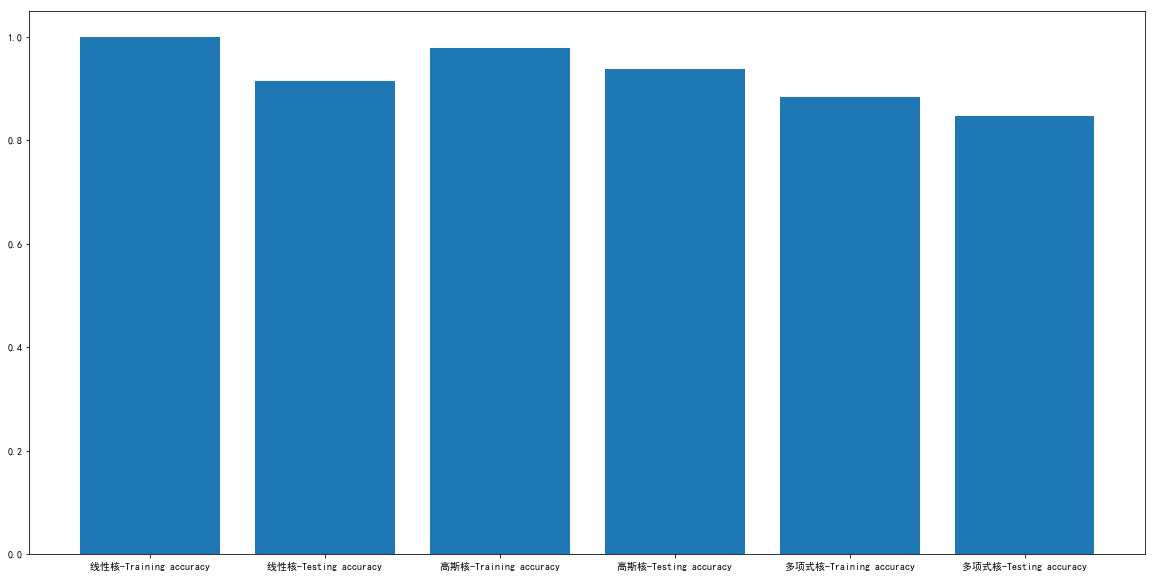

In [38]:
TA = [1.0000,0.9147,0.9780,0.9370,0.8830,0.8467]
x = ['线性核-Training accuracy','线性核-Testing accuracy','高斯核-Training accuracy','高斯核-Testing accuracy','多项式核-Training accuracy','多项式核-Testing accuracy']
training = pd.Series(TA,x)
print(training)
plt.figure(figsize=(20,10))
fig2 = plt.bar(x,TA); 

在`gamma = auto`, `C=1`时，经过判断，高斯核函数学习较好，线性核函数为过学习，而多项式核为欠学习

## 1.6 以高斯为核函数，调节参数C

C：惩罚参数，默认为1.0。

C越大，对误分类的惩罚增大，泛化能力弱。C越小，对误分类的惩罚减小，泛化能力强。

In [8]:
c = np.logspace(-7,1,8)        #log空间划分数组
Training_accuracy = []
Testing_Accuracy = []
for i in range(8):
    clf = svm.SVC(C=c[i],kernel='rbf',gamma='auto')    #（kernel  核函数（多项式函数是poly)（c就是分类的意思）
    clf.fit(X_train, y_train.ravel())    #.ravel y是个m*1的列矢量，变为m个列矢量    C是带宽

    lr_cv_predict_train = clf.predict(X_train)
    # training metrics
    Training_accuracy.append(metrics.accuracy_score(y_train, lr_cv_predict_train))

    lr_cv_predict_test = clf.predict(X_test)

    # training metrics
    Testing_Accuracy.append(metrics.accuracy_score(y_test, lr_cv_predict_test))


D:\software\anaconda\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


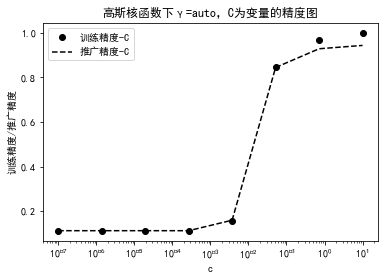

In [10]:
fig1, = plot(c,Training_accuracy,'ko');             #加逗号是为了输出图例
fig2, = plot(c,Testing_Accuracy,"k--");
legend(handles=[fig1, fig2], labels=['训练精度-C', '推广精度-C'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
plt.title("高斯核函数下γ=auto，C为变量的精度图")
xlabel("c")
ylabel("训练精度/推广精度")
plt.xscale('log')

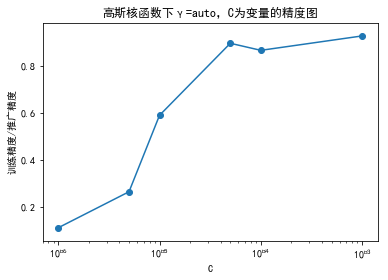

In [67]:
#利用特殊点画图
n_accuracy = np.array([0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.001])
accuracy = np.array([0.1123, 0.2657, 0.5910, 0.8977, 0.8677, 0.9290])

plt.title("高斯核函数下γ=auto，C为变量的精度图")
plot(n_accuracy, accuracy)
plt.scatter(n_accuracy, accuracy)
plt.xlabel("C")
plt.ylabel("训练精度/推广精度")
plt.xscale('log')

plt.show()

由图可知，C相对较小比较好。

## 1.7 以高斯为核函数，调节参数 $γ$

γ的物理意义是RBF的幅宽，它会影响每个支持向量对应的高斯的作用范围，从而影响泛化性能。

如果γ设的太大，会很小，很小的高斯分布长得又高又瘦，会造成只会作用于支持向量样本附近，对于未知样本分类效果很差，存在训练准确率可以很高，(如果让σ无穷小，则理论上，高斯核的SVM可以拟合任何非线性数据，但容易过拟合)而测试准确率不高的可能，就是通常说的过拟合；

而如果设的过小，则会造成平滑效应太大，无法在训练集上得到特别高的准确率，也会影响测试集的准确率，为欠学习


In [13]:
Gamma = np.logspace(-4,1,7)        #log空间划分数组
Training_accuracy = []
Testing_Accuracy = []
for i in range(7):
    clf = svm.SVC(kernel='rbf',gamma=Gamma[i])    #（kernel  核函数（多项式函数是poly)（c就是分类的意思）
    clf.fit(X_train, y_train.ravel())    #.ravel y是个m*1的列矢量，变为m个列矢量    C是带宽

    lr_cv_predict_train = clf.predict(X_train)
    # training metrics
    Training_accuracy.append(metrics.accuracy_score(y_train, lr_cv_predict_train))


    lr_cv_predict_test = clf.predict(X_test)

    # training metrics
    Testing_Accuracy.append(metrics.accuracy_score(y_test, lr_cv_predict_test))


Text(0, 0.5, '训练精度/推广精度')

D:\software\anaconda\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


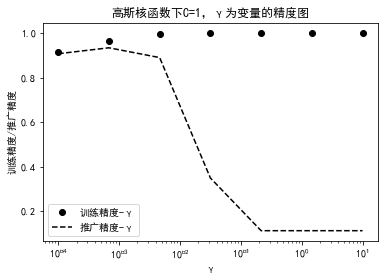

In [14]:
fig3, = plot(Gamma,Training_accuracy,'ko');             #加逗号是为了输出图例
fig4, = plot(Gamma,Testing_Accuracy,"k--");
legend(handles=[fig3, fig4], labels=['训练精度-γ', '推广精度-γ'])           #输出图例

#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
plt.title("高斯核函数下C=1，γ为变量的精度图")
plt.xscale('log')
xlabel("γ")
ylabel("训练精度/推广精度")

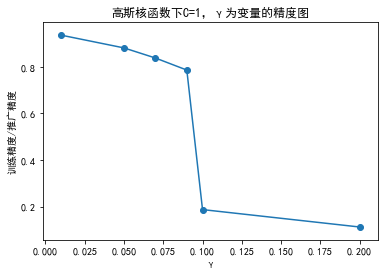

In [65]:
#利用特殊点画图
n_accuracy = np.array([0.01, 0.05, 0.07, 0.09, 0.1, 0.2])
accuracy = np.array([0.9350, 0.8803, 0.8370, 0.7853, 0.187, 0.1123])

plt.title("高斯核函数下C=1，γ为变量的精度图")
plot(n_accuracy, accuracy)
plt.scatter(n_accuracy, accuracy)
plt.xlabel("γ")
plt.ylabel("训练精度/推广精度")
#plt.xscale('log')

plt.show()

在以高斯为核函数, `C=1`时，由图可知，γ相对较大比较好

## 总结：

小一点的Ｃ和大一点的γ的推广能力比较强．核函数选高斯函数比较好。

多项式核容易欠学习，线性核容易过学习。

Ｃ（分类阈值）适当高一些会提高分类精度，但是太高会跨过数据，因此对数据有要求。

γ越大表示高斯函数展宽越宽，推广能力强，但是太大也会导致精度欠学习，而且运行时间巨长.

# 2 探索 [scikit-learn](https://scikit-learn.org/stable/documentation.html)

*scikit-learn* 是基于`Numpy`的非常成熟的 Python 机器学习库。里面包含了几乎所有除 *深度学习* 以外的机器学习算法。是学习机器学习的很好的参考资料。

## 2.1 SGDClassfier

In [55]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train.ravel())
lr_cv_predict_train = clf.predict(X_train)
# training metrics
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

print("==========================================================================")

lr_cv_predict_test = clf.predict(X_test)

# training metrics
print("Testing Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

D:\software\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Training accuracy: 0.9330
Testing Accuracy: 0.9100


In [56]:
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

## 2.2 随机森林 

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)

clf.fit(X_train, y_train.ravel()) 
lr_cv_predict_train = clf.predict(X_train)
# training metrics
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

print("==========================================================================")

lr_cv_predict_test = clf.predict(X_test)

# training metrics
print("Testing Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Training accuracy: 0.9984
Testing Accuracy: 0.9117


In [58]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 2.3 自动交叉验证的 Logistic Regression

算出最佳超参数

In [59]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(Cs=10,max_iter=100,cv= 10,multi_class='auto')  #分成10份，做十次交叉验证，求平均得到最佳的超参数

clf.fit(X_train, y_train.ravel()) 
lr_cv_predict_train = clf.predict(X_train)
# training metrics
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

print("==========================================================================")

lr_cv_predict_test = clf.predict(X_test)

# training metrics
print("Testing Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\softwar

Training accuracy: 0.9437
Testing Accuracy: 0.9167


In [60]:
clf

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='auto', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)